In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

In [2]:
# Get all the tickers of S&P 100 from Wikipedia

url = 'https://en.wikipedia.org/wiki/S%26P_100'
response = requests.get(url)

if response.status_code == 200:
    parsed_data = BeautifulSoup(response.content, 'html.parser')
    
    table = parsed_data.find('table', {'id': 'constituents'})
    
    if table:
        snp100 = [row.find_all('td')[0].get_text(strip=True) for row in table.find_all('tr') if row.find_all('td')]
    else:
        print("Table not found.")
else:
    print(f"Failed to fetch. Status code: {response.status_code}")

snp100


['AAPL',
 'ABBV',
 'ABT',
 'ACN',
 'ADBE',
 'AIG',
 'AMD',
 'AMGN',
 'AMT',
 'AMZN',
 'AVGO',
 'AXP',
 'BA',
 'BAC',
 'BK',
 'BKNG',
 'BLK',
 'BMY',
 'BRK.B',
 'C',
 'CAT',
 'CHTR',
 'CL',
 'CMCSA',
 'COF',
 'COP',
 'COST',
 'CRM',
 'CSCO',
 'CVS',
 'CVX',
 'DE',
 'DHR',
 'DIS',
 'DOW',
 'DUK',
 'EMR',
 'EXC',
 'F',
 'FDX',
 'GD',
 'GE',
 'GILD',
 'GM',
 'GOOG',
 'GOOGL',
 'GS',
 'HD',
 'HON',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'KHC',
 'KO',
 'LIN',
 'LLY',
 'LMT',
 'LOW',
 'MA',
 'MCD',
 'MDLZ',
 'MDT',
 'MET',
 'META',
 'MMM',
 'MO',
 'MRK',
 'MS',
 'MSFT',
 'NEE',
 'NFLX',
 'NKE',
 'NVDA',
 'ORCL',
 'PEP',
 'PFE',
 'PG',
 'PM',
 'PYPL',
 'QCOM',
 'RTX',
 'SBUX',
 'SCHW',
 'SO',
 'SPG',
 'T',
 'TGT',
 'TMO',
 'TMUS',
 'TSLA',
 'TXN',
 'UNH',
 'UNP',
 'UPS',
 'USB',
 'V',
 'VZ',
 'WFC',
 'WMT',
 'XOM']

In [3]:
# Correcting ticker name for Berkshire Hathaway

i = snp100.index('BRK.B')
snp100[i] = 'BRK-B'
snp100

['AAPL',
 'ABBV',
 'ABT',
 'ACN',
 'ADBE',
 'AIG',
 'AMD',
 'AMGN',
 'AMT',
 'AMZN',
 'AVGO',
 'AXP',
 'BA',
 'BAC',
 'BK',
 'BKNG',
 'BLK',
 'BMY',
 'BRK-B',
 'C',
 'CAT',
 'CHTR',
 'CL',
 'CMCSA',
 'COF',
 'COP',
 'COST',
 'CRM',
 'CSCO',
 'CVS',
 'CVX',
 'DE',
 'DHR',
 'DIS',
 'DOW',
 'DUK',
 'EMR',
 'EXC',
 'F',
 'FDX',
 'GD',
 'GE',
 'GILD',
 'GM',
 'GOOG',
 'GOOGL',
 'GS',
 'HD',
 'HON',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'KHC',
 'KO',
 'LIN',
 'LLY',
 'LMT',
 'LOW',
 'MA',
 'MCD',
 'MDLZ',
 'MDT',
 'MET',
 'META',
 'MMM',
 'MO',
 'MRK',
 'MS',
 'MSFT',
 'NEE',
 'NFLX',
 'NKE',
 'NVDA',
 'ORCL',
 'PEP',
 'PFE',
 'PG',
 'PM',
 'PYPL',
 'QCOM',
 'RTX',
 'SBUX',
 'SCHW',
 'SO',
 'SPG',
 'T',
 'TGT',
 'TMO',
 'TMUS',
 'TSLA',
 'TXN',
 'UNH',
 'UNP',
 'UPS',
 'USB',
 'V',
 'VZ',
 'WFC',
 'WMT',
 'XOM']

In [4]:
# Function for preprocessing data of a single ticker to desired format of Zipline

def preprocess(data):
    data.reset_index(inplace=True)
    data.drop(columns=['Adj Close'], inplace=True)
    data.rename(columns={'Date': 'timestamp', 'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Volume': 'volume', }, inplace=True)
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['volume'] = data['volume'].astype('float64')
    data.sort_values(by='timestamp', inplace=True)
    data.reset_index(drop=True, inplace=True)

    return data

In [5]:
# Fetching historical data for each ticker in S&P100

start_date = '2013-01-01'
end_date = '2023-12-31'

snp100_data_dict = {}

for ticker in snp100:
    data = yf.download(ticker, start=start_date, end=end_date, interval='1d')
    preprocess(data).to_csv(f'/home/sharar/Documents/SNP100/daily/{ticker}.csv', index=False)
    snp100_data_dict[ticker] = data

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

## Register and Ingest S&P100 Bundle

In [6]:
from zipline.data import bundles

bundle_name = 'snp100'

bundles.register(
    bundle_name,
    bundles.csvdir.csvdir_equities(
        ['daily'],
        '/home/sharar/Documents/SNP100'
    ),
    calendar_name='NYSE',

)
 
bundles.bundles

mappingproxy({'quandl': RegisteredBundle(calendar_name='NYSE', start_session=None, end_session=None, minutes_per_day=390, ingest=<function quandl_bundle at 0x7fd48239fd80>, create_writers=True),
              'quantopian-quandl': RegisteredBundle(calendar_name='NYSE', start_session=None, end_session=None, minutes_per_day=390, ingest=<function quantopian_quandl_bundle at 0x7fd48239fe20>, create_writers=False),
              'csvdir': RegisteredBundle(calendar_name='NYSE', start_session=None, end_session=None, minutes_per_day=390, ingest=<function csvdir_bundle at 0x7fd4823a8040>, create_writers=True),
              'snp100': RegisteredBundle(calendar_name='NYSE', start_session=None, end_session=None, minutes_per_day=390, ingest=<bound method CSVDIRBundle.ingest of <zipline.data.bundles.csvdir.CSVDIRBundle object at 0x7fd4ca8bf490>>, create_writers=True)})

In [7]:
bundles.ingest(bundle_name)

In [8]:
bundle_data = bundles.load(bundle_name)
sids = bundle_data.asset_finder.sids
assets = bundle_data.asset_finder.retrieve_all(sids)

print(assets)

[Equity(0 [AAPL]), Equity(1 [ABBV]), Equity(2 [ABT]), Equity(3 [ACN]), Equity(4 [ADBE]), Equity(5 [AIG]), Equity(6 [AMD]), Equity(7 [AMGN]), Equity(8 [AMT]), Equity(9 [AMZN]), Equity(10 [AVGO]), Equity(11 [AXP]), Equity(12 [BA]), Equity(13 [BAC]), Equity(14 [BK]), Equity(15 [BKNG]), Equity(16 [BLK]), Equity(17 [BMY]), Equity(18 [BRK-B]), Equity(19 [C]), Equity(20 [CAT]), Equity(21 [CHTR]), Equity(22 [CL]), Equity(23 [CMCSA]), Equity(24 [COF]), Equity(25 [COP]), Equity(26 [COST]), Equity(27 [CRM]), Equity(28 [CSCO]), Equity(29 [CVS]), Equity(30 [CVX]), Equity(31 [DE]), Equity(32 [DHR]), Equity(33 [DIS]), Equity(34 [DOW]), Equity(35 [DUK]), Equity(36 [EMR]), Equity(37 [EXC]), Equity(38 [F]), Equity(39 [FDX]), Equity(40 [GD]), Equity(41 [GE]), Equity(42 [GILD]), Equity(43 [GM]), Equity(44 [GOOG]), Equity(45 [GOOGL]), Equity(46 [GS]), Equity(47 [HD]), Equity(48 [HON]), Equity(49 [IBM]), Equity(50 [INTC]), Equity(51 [JNJ]), Equity(52 [JPM]), Equity(53 [KHC]), Equity(54 [KO]), Equity(55 [LIN

In [9]:
!zipline ingest -b snp100

[2024-01-17T19:09:40+0600-INFO][zipline.data.bundles.core]
 Ingesting snp100
Loading custom pricing data:   [####################################]  100%          
Merging daily equity files:  [####################################]     
[2024-01-17T19:09:47+0600-INFO][root]
 copying /tmp/tmp0gzdgb46/snp100/2024-01-17T13;09;39.958396/adjustments.sqlite -> /home/sharar/.zipline/data/snp100/2024-01-17T13;09;39.958396
[2024-01-17T19:09:47+0600-INFO][root]
 creating /home/sharar/.zipline/data/snp100/2024-01-17T13;09;39.958396/daily_equities.bcolz
[2024-01-17T19:09:47+0600-INFO][root]
 creating /home/sharar/.zipline/data/snp100/2024-01-17T13;09;39.958396/daily_equities.bcolz/low
[2024-01-17T19:09:47+0600-INFO][root]
 copying /tmp/tmp0gzdgb46/snp100/2024-01-17T13;09;39.958396/daily_equities.bcolz/low/__attrs__ -> /home/sharar/.zipline/data/snp100/2024-01-17T13;09;39.958396/daily_equities.bcolz/low
[2024-01-17T19:09:47+0600-INFO][root]
 creating /home/sharar/.zipline/data/snp100/2024-01-17T13;0

In [10]:
!zipline bundles

csvdir <no ingestions>
quandl 2023-12-11 07:37:18.949895
quandl 2023-12-11 07:24:36.984727
quandl 2023-12-11 07:24:06.199682
quandl 2023-12-11 07:07:08.337964
quandl 2023-12-11 07:00:35.935335
quandl 2023-12-11 06:31:16.394693
quandl 2023-12-11 06:26:05.247892
quandl 2023-12-11 06:25:12.688731
quantopian-quandl <no ingestions>
snp100 2024-01-17 13:09:39.958396
snp100 2024-01-17 13:09:04.134613
snp100 2023-12-18 07:22:19.588708
snp100 2023-12-18 07:21:47.265554
snp100 2023-12-17 09:13:05.992381
snp100 2023-12-17 09:12:43.885622
snp100 2023-12-17 09:12:20.175455
snp100 2023-12-17 09:12:01.765181
snp100 2023-12-17 08:59:15.908078
snp100 2023-12-17 08:58:44.919270
snp100 2023-12-14 12:33:12.615395
snp100 2023-12-14 12:32:51.950190
snp100 2023-12-14 06:17:55.773368
snp100 2023-12-14 06:17:41.776122
snp100 2023-12-13 16:28:34.337289
snp100 2023-12-13 16:27:01.629739
snp100 2023-12-13 16:24:44.412941
snp100 2023-12-13 16:23:17.224028
snp100 2023-12-13 16:22:32.401687


## Backtest with Keltner, add Stop Loss & Take Profit

In [11]:
from strategy.keltner import keltner
from zipline.api import (order, order_target, record, symbol, get_datetime,
                         order_target_percent,
                         order_target_value,
                         set_benchmark,
                         get_open_orders)
from zipline import run_algorithm

In [12]:
def asset_df(symbol):
    df = pd.read_csv('/home/sharar/Documents/SNP100/daily/' + str(symbol) + '.csv')
    return df.set_index(pd.DatetimeIndex(df.timestamp))

In [13]:
%%capture kltr

capital_base = 10000
symb = 'TSLA'
window = 90

def initialize(context):
    context.i = 0
    # set_benchmark(symbol(symb))

    assets = list()
    for ticker in snp100:
        assets.append(symbol(ticker))

    context.assets = assets
    
    context.signals = {}
    for asset in context.assets:
        df = asset_df(asset.symbol)
        signals, mid, upper, lower = keltner(df, span=window, strategy=1, TimeperiodLong =40, TimeperiodShort =4, AdaWin =4)
        context.signals[asset.symbol] = signals 
    context.i = 0
    
def handle_data(context, data):
    # Skip first 300 days to get full windows
    context.i += 1
    if context.i < window+1:
        return

    # Compute averages
    # data.history() has to be called with the same params
    # from above and returns a pandas dataframe.
    # cash = min(context.portfolio.cash, 20000)
    current_date = data.history(context.assets[0], 'price', bar_count=2, frequency="1d").index[-1]
    for asset in context.assets:
        if data.can_trade(asset) and not get_open_orders(asset):
            cash = context.portfolio.cash
            price = data.current(asset, "price")
            # Find corresponding signal
            # open_orders = get_open_orders()
            if context.signals[asset.symbol][current_date]==1:
                # 1 signal means upward trend
                order_target(asset, cash//price, stop_price=(price*0.95), limit_price=(price*1.10)) # Stop loss at 5% and take profit at 10%
            elif context.signals[asset.symbol][current_date]==-1:
                # Assume downward trend and sell off
                order_target(asset, 0)
            else:
                pass
    

result = run_algorithm(start=pd.to_datetime(start_date),
                        end=pd.to_datetime(end_date),
                        initialize=initialize,
                        handle_data=handle_data,
                        capital_base=capital_base,
                        bundle='snp100',
                        data_frequency='daily',
                        )

## Indicator
The Keltner Channel is a technical analysis indicator used in charting to identify trends, gauge volatility, and potentially find oversold/overbought conditions. It consists of three lines:
1. Center Line: A 20-period Exponential Moving Average (EMA) of the underlying asset's price. This represents the "average" price and indicates the trend direction.
2. Upper Band: Calculated by adding two Average True Ranges (ATR) to the center line. ATR measures average price volatility over a recent period. Higher ATR indicates higher volatility, resulting in wider bands.
3. Lower Band: Calculated by subtracting two ATRs from the center line. Lower ATR indicates lower volatility, leading to narrower bands.

Price within the channel: When price stays within the channel, it suggests a continuing trend or consolidation. The closer the price to the center line, the less volatile the market.

Breakouts:
1. Above the upper band: Potential bullish signal, indicating strong upward momentum.
2. Below the lower band: Potential bearish signal, suggesting strong downward pressure.
3. Reversals: If price bounces off the upper or lower band, it might signal a trend reversal.   
  
  
## Strategy
Adaptive Moving Average (AMA) strategy is used, which calculates an average of past price data points. However, instead of using a fixed weight for each data point, AMAs assign higher weights to more recent price changes and lower weights to older ones.
AMAs also consider the volatility of the market when assigning weights. During periods of high volatility, the weights given to recent price changes are reduced, making the AMA less sensitive and less likely to be swayed by short-term fluctuations. Conversely, during periods of low volatility, the weights are increased, making the AMA more responsive to smaller price changes and potentially providing earlier signals of trend changes.


## Risk management tools
Stop Loss is a pre-defined order to automatically sell an asset when its price reaches a specific level set by the trader. The purpose is to limit potential losses on a trade if the price moves against the trader's prediction. It protects capital by preventing large losses, allows traders to manage risk and protect their overall portfolio, and provides peace of mind by automatically exiting a losing trade. Stop loss is set up based on risk tolerance and volatility of the asset. Common strategies include fixed percentage of capital at risk, ATR multiples, or technical support levels.

Take Profit is a pre-defined order to automatically sell an asset when its price reaches a specific profit target set by the trader. The purpose is to lock in profits before a potential reversal or market correction. It helps secure profits and achieve trading goals, avoid giving back gains by automatic exit at the target price, and improves discipline and prevents greed from overriding your trading plan. Take profit is set up based on risk-reward ratio, technical resistance levels, or profit targets aligned with our trading strategy.

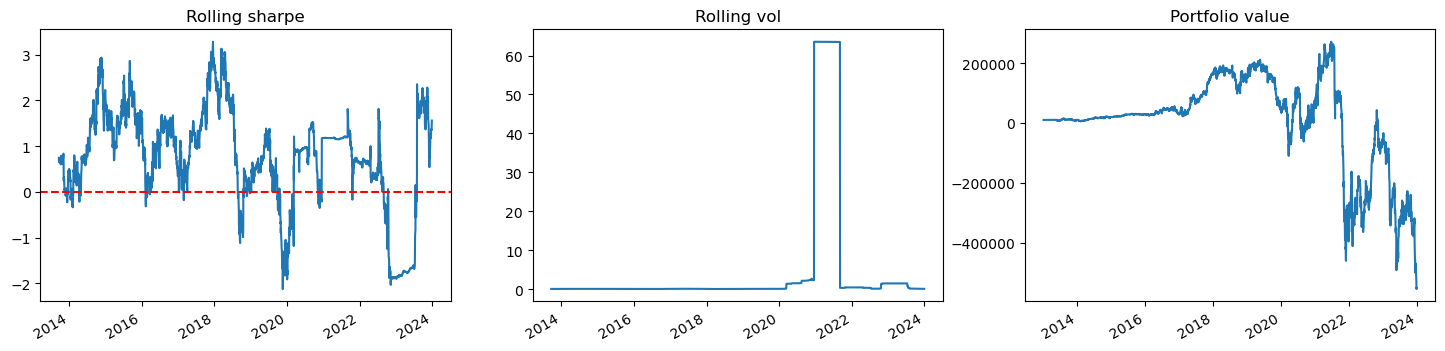

In [14]:
%matplotlib inline

import modules.stats_main as stat
result = stat.show_rolling_stats(result, 180)

In [22]:
%matplotlib inline
import quantstats as qs
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/sharar/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/sharar/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/sharar/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduct

                           Strategy
-------------------------  ----------
Start Period               2013-01-02
End Period                 2023-12-29
Risk-Free Rate             0.0%
Time in Market             97.0%

Cumulative Return          -5,616.68%
CAGR﹪                     28.64%

Sharpe                     0.3
Prob. Sharpe Ratio         97.47%
Smart Sharpe               0.3
Sortino                    9.92
Smart Sortino              9.92
Sortino/√2                 7.01
Smart Sortino/√2           7.01
Omega                      5.54

Max Drawdown               -304.68%
Longest DD Days            919
Volatility (ann.)          25729.64%
Calmar                     0.09
Skew                       52.43
Kurtosis                   2754.9

Expected Daily %           -
Expected Monthly %         -
Expected Yearly %          -
Kelly Criterion            41.87%
Risk of Ruin               0.0%
Daily Value-at-Risk        -2635.47%
Expected Shortfall (cVaR)  -2635.47%

Max Consecutive Wins   

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2021-06-24,2023-12-28,2023-12-29,919,-304.675662,-281.374441
2,2019-05-21,2020-03-23,2021-02-12,634,-152.231481,-134.315780
3,2013-08-09,2014-02-03,2014-06-23,319,-63.184487,-59.457746
4,2016-11-11,2017-02-06,2017-04-26,166,-60.427103,-55.451721
5,2018-04-19,2018-09-17,2019-01-28,285,-49.068363,-46.715701


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


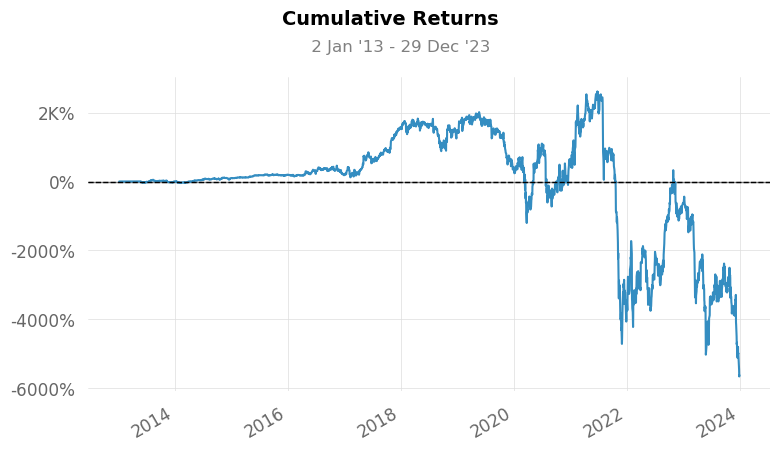

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


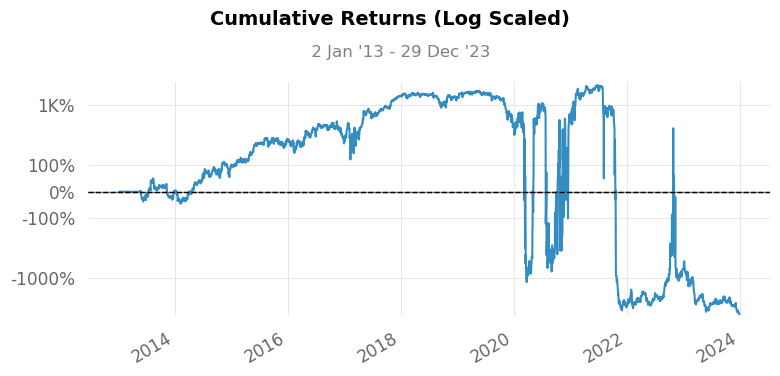

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


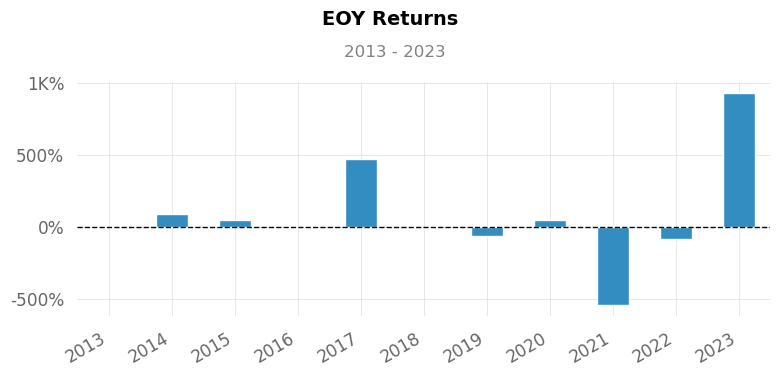

/home/sharar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sharar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


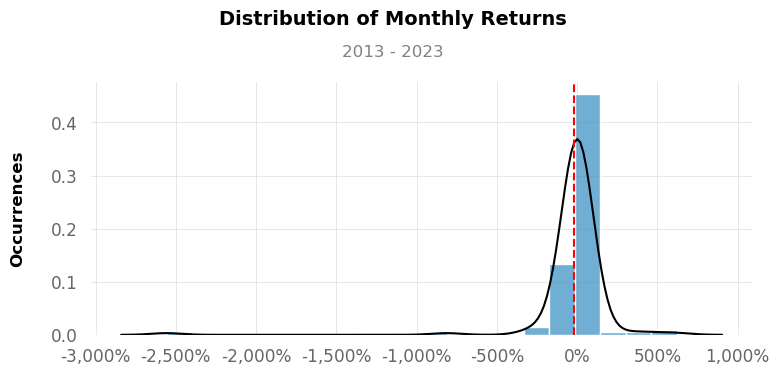

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


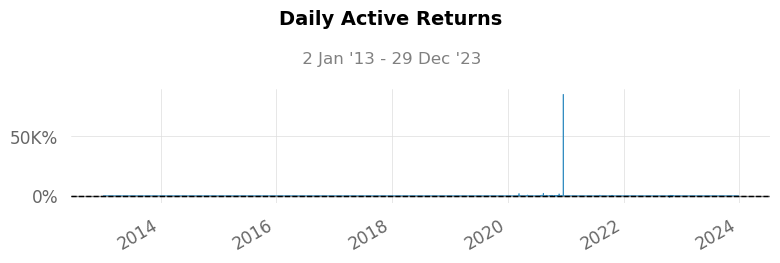

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


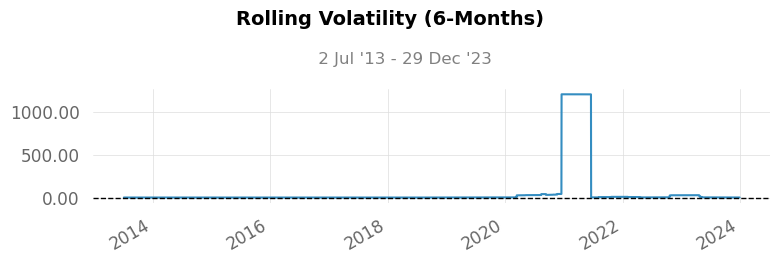

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


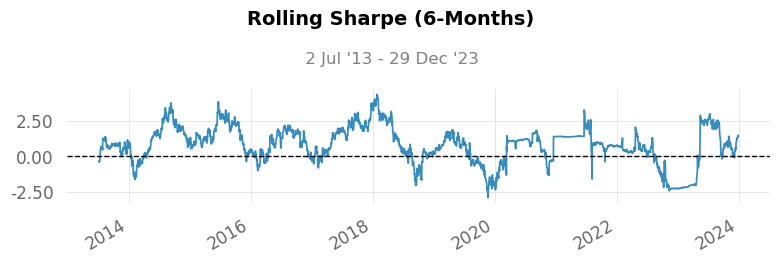

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


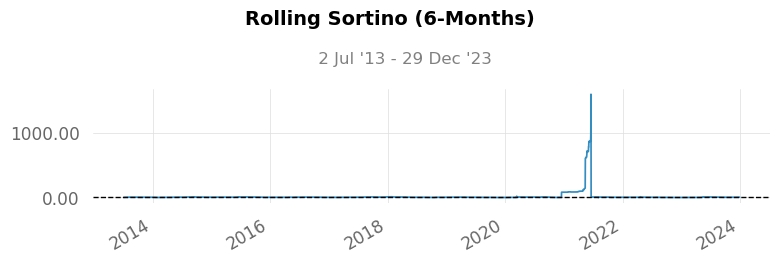

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


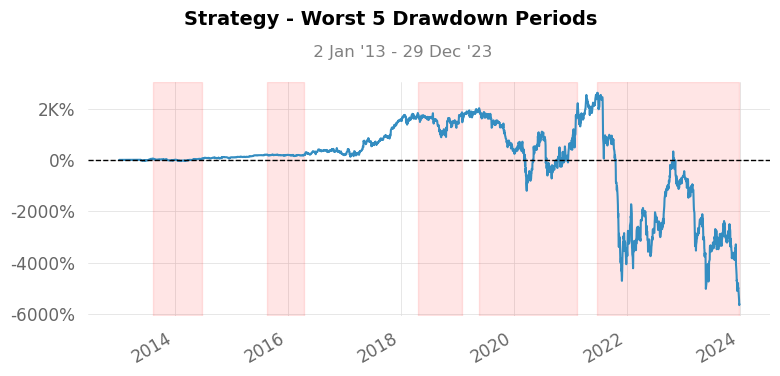

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


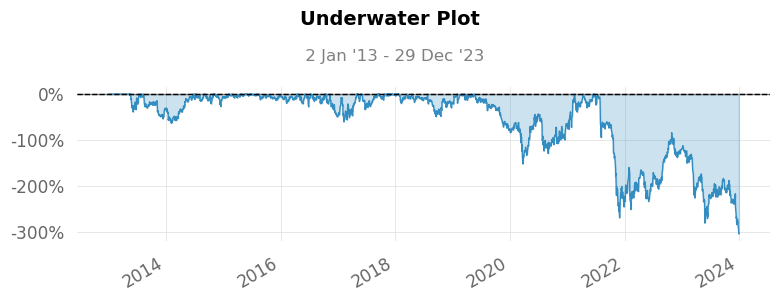

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


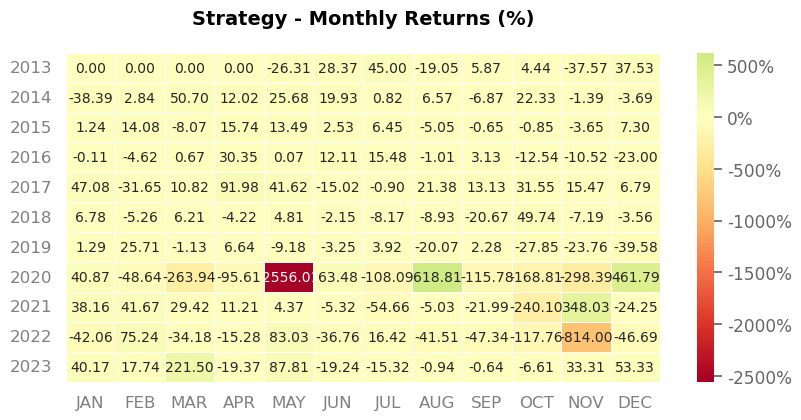

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


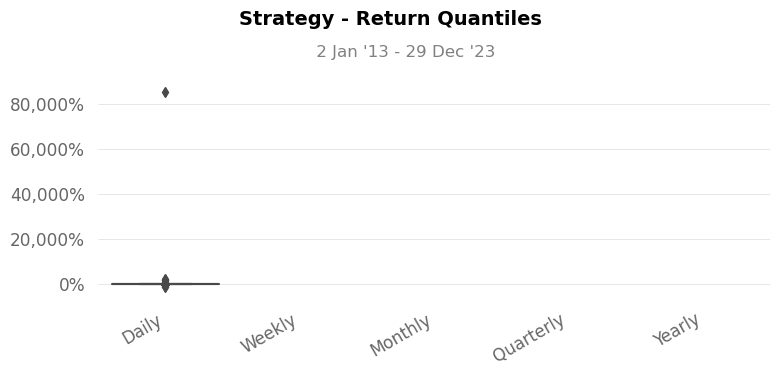

In [23]:
qs.reports.full(result.returns)

## Interpreting the tearsheet
Statistics:
1. The Sharpe ratio is the ratio between risk and reward, which is at 0.3, indicating a positive outcome
2. Max Drawdown visualizes the largest peak-to-trough declines in portfolio value, which is at -304.68%, but the average drawdown is only at -16.83%
3. All other returns (daily, monthly, annual) have consistently shown to be positive values
All in all, it can be stated that the statistics show a net positive result in investing in these stocks.

Graphs:
1. Cumulative Returns plots the growth of an initial investment over time, which is generally upward till the end of 2022.
2. All other returns show a net positive effect.
3. Rolling Sharpe and Rolling Volatility show the Sharpe Ratio and volatility/risk/standard deviation over different time periods, respectively. Rolling Sharpe is mostly positive, while Rolling Volatility only rises between 2021 and 2022, but stays extremely low in other years.
4. Underwater Plot shows max drawdowns, which is highest between 2021 and 2022.
5. Monthly Returns are highest in May 2020.
6. Daily Return Quartiles exceed 80000% between 2013 and 2023.

## Future Improvements
1. Setting a single stock among the top 5, like Amazon or Tesla, as the benchmark may help us compare our strategy's performance to actual market conditions.
2. Using neural network models, such as RNNs (LSTM and GRU, for example) or GANs, may lead to better analysis, given that they can take in large amounts of data in repetitive fashion for processing, and the results have a high chance of being accurate.
3. Considering a longer timeframe (such as 20 years; 2003-2023) may give us more info on how the trends in stock prices have changed over the years, while a shorter timeframe (such as the past 5 years) may adjust the analysis according to recent world conditions (like COVID-19) more accurately.